In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import streamlit

In [2]:
train_data =  pd.read_excel('Data_Train.xlsx')

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
def extract_date_info(df,date_col,dep_time_col,arrival_time_col,duration_col):
    
    #to extract date,month and year of the journey date
    train_data['Journey_day']=pd.to_datetime(df[date_col],format="%d/%m/%Y").dt.day
    train_data['Journey_month']=pd.to_datetime(df[date_col],format="%d/%m/%Y").dt.month
    train_data['Journey_year']=pd.to_datetime(df[date_col],format="%d/%m/%Y").dt.year
    train_data.drop([date_col],axis=1,inplace=True)
    
    #to extract Departure hour and min from Departure time col
    train_data['Dep_hour']=pd.to_datetime(df[dep_time_col]).dt.hour
    train_data['Dep_min']=pd.to_datetime(df[dep_time_col]).dt.minute
    train_data.drop([dep_time_col],axis=1,inplace=True)
    
    #to extract Arrival hour and min from Arrival time col
    train_data['Arrival_hour']=pd.to_datetime(df[arrival_time_col]).dt.hour
    train_data['Arrival_min']=pd.to_datetime(df[arrival_time_col]).dt.minute
    train_data.drop([arrival_time_col],axis=1,inplace=True)
    
    #to extract Duration hour and min from Duration col
    duration_hour = []
    duration_mintue = []
    for i in train_data[duration_col]:
        hours = 0
        mintues = 0
        duration_part = i.split()
        if(len(duration_part)==2):
            hours= int(duration_part[0][:-1])
            mintue = int(duration_part[1][:-1])
        elif('h' in duration_part[0]):
            hours= int(duration_part[0][:-1])
        else:
            mintue = int(duration_part[0][:-1])
        duration_hour.append(hours) 
        duration_mintue.append(mintues) 
    train_data['Duration_hour'] = duration_hour
    train_data['Duration_min'] = duration_mintue
    train_data.drop([duration_col],axis=1,inplace=True)
    
    return train_data

In [12]:
extract_date_info(train_data,'Date_of_Journey','Dep_Time','Arrival_Time','Duration')

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,19,55,22,25,2,0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,2,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,11,30,14,10,2,0


In [13]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,0


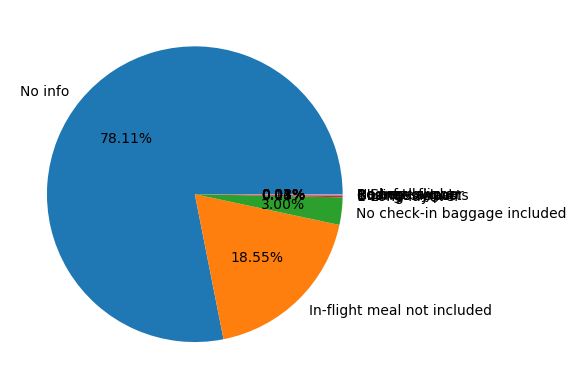

In [14]:
label = train_data['Additional_Info'].value_counts().keys()
Value_count = train_data['Additional_Info'].value_counts()
plt.pie(Value_count,labels=label,autopct='%.2f%%')
plt.show()
#As you can see more then 78% of value are "NO info" in Additional_Info col so we can Additional_Info drop that col

In [15]:
train_data.drop(['Additional_Info'],axis=1,inplace=True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,2019,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,2019,5,50,13,15,7,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,2019,18,5,23,30,5,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,2019,16,50,21,35,4,0


In [17]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,2019,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,2019,5,50,13,15,7,0


In [18]:
#Creating a another feature from departure col ("Day/Night" flight)
Dep_time = train_data['Dep_hour']
Night_flight=[]
for i in Dep_time:
    if(i>=4 and i<=20):
        Night_flight.append("Day")
    else:
        Night_flight.append("Night") 

In [19]:
train_data['Day/Night_flight'] = Night_flight

In [20]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Day/Night_flight
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,2019,22,20,1,10,2,0,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,2019,5,50,13,15,7,0,Day


<AxesSubplot:xlabel='Dep_hour', ylabel='Price'>

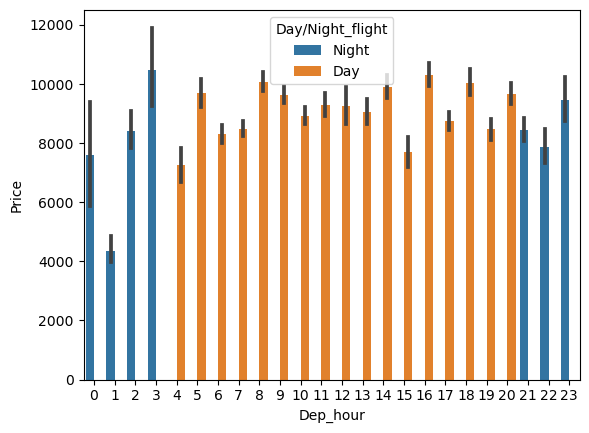

In [21]:
sns.barplot(x=train_data['Dep_hour'],y=train_data['Price'],hue=train_data['Day/Night_flight'])

In [22]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

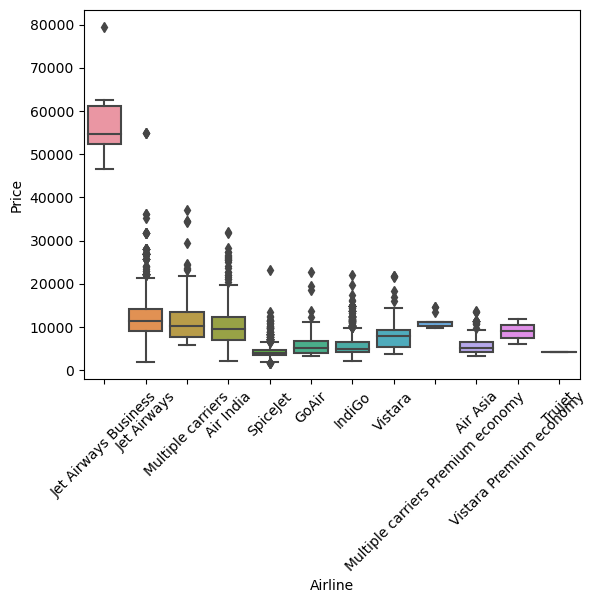

In [23]:
#plt.figure(figsize=(25,10))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values("Price",ascending=False))
plt.xticks(rotation=45)
plt.show()

In [24]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Day/Night_flight
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,2019,22,20,1,10,2,0,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,2019,5,50,13,15,7,0,Day


In [25]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [26]:
def OneHotEncoding(df):
    
    #OneHotEncoding Ariline columns
    Airline = pd.get_dummies(df[['Airline']],drop_first=True)
    
    #OneHotEncoding Source columns
    Source = pd.get_dummies(df[['Source']],drop_first=True)
    
    #OneHotEncoding Destination columns
    Destination = pd.get_dummies(df[['Destination']],drop_first=True)
    
    #NormialEncoding Total_stops columns
    Total_Stops = df.replace({'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4},inplace=True)
    
    #NormialEncoding Day/Night_flight columns
    DayOrNight_flight = df.replace({'Night':0,'Day':1},inplace=True)
    
    df = pd.concat([df,Airline,Source,Destination,DayOrNight_flight,Total_Stops],axis=1)
    
    return df

In [27]:
train_data = OneHotEncoding(train_data)

In [28]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Day/Night_flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,2019,22,20,1,10,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1,7662,1,5,2019,5,50,13,15,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [29]:
train_data.drop(['Airline','Source','Destination','Route'],axis=1,inplace=True)

In [30]:
Price = train_data[['Price']]

In [31]:
train_data.drop(['Price'],axis=1,inplace=True)

In [32]:
train_data = pd.concat([train_data,Price],axis=1)

In [33]:
train_data.head(2)

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Day/Night_flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,24,3,2019,22,20,1,10,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897
1,1,1,5,2019,5,50,13,15,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662


In [34]:
#All the step for Test Data set also
test_data = pd.read_excel('Test_set.xlsx')

In [35]:
test_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [36]:
test_data.shape

(2671, 10)

In [37]:
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [38]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [39]:
def extract_date_info(df,date_col,dep_time_col,arrival_time_col,duration_col):
    
    #to extract date,month and year of the journey date
    test_data['Journey_day']=pd.to_datetime(df[date_col],format="%d/%m/%Y").dt.day
    test_data['Journey_month']=pd.to_datetime(df[date_col],format="%d/%m/%Y").dt.month
    test_data['Journey_year']=pd.to_datetime(df[date_col],format="%d/%m/%Y").dt.year
    test_data.drop([date_col],axis=1,inplace=True)
    
    #to extract Departure hour and min from Departure time col
    test_data['Dep_hour']=pd.to_datetime(df[dep_time_col]).dt.hour
    test_data['Dep_min']=pd.to_datetime(df[dep_time_col]).dt.minute
    test_data.drop([dep_time_col],axis=1,inplace=True)
    
    #to extract Arrival hour and min from Arrival time col
    test_data['Arrival_hour']=pd.to_datetime(df[arrival_time_col]).dt.hour
    test_data['Arrival_min']=pd.to_datetime(df[arrival_time_col]).dt.minute
    test_data.drop([arrival_time_col],axis=1,inplace=True)
    
    #to extract Duration hour and min from Duration col
    duration_hour = []
    duration_mintue = []
    for i in test_data[duration_col]:
        hours = 0
        mintues = 0
        duration_part = i.split()
        if(len(duration_part)==2):
            hours= int(duration_part[0][:-1])
            mintue = int(duration_part[1][:-1])
        elif('h' in duration_part[0]):
            hours= int(duration_part[0][:-1])
        else:
            mintue = int(duration_part[0][:-1])
        duration_hour.append(hours) 
        duration_mintue.append(mintues) 
    test_data['Duration_hour'] = duration_hour
    test_data['Duration_min'] = duration_mintue
    test_data.drop([duration_col],axis=1,inplace=True)
    
    return test_data

In [40]:
extract_date_info(test_data,'Date_of_Journey','Dep_Time','Arrival_Time','Duration')

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,17,30,4,25,10,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2019,23,55,2,45,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,2019,20,30,20,25,23,0
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,2019,14,20,16,55,2,0
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,2019,21,50,4,25,6,0
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,2019,4,0,19,15,15,0


In [41]:
#Creating a another feature from departure col ("Day/Night" flight)
Dep_time = test_data['Dep_hour']
Night_flight=[]
for i in Dep_time:
    if(i>=4 and i<=20):
        Night_flight.append("Day")
    else:
        Night_flight.append("Night") 
test_data['Day/Night_flight'] = Night_flight     

In [42]:
test_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Day/Night_flight
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,17,30,4,25,10,0,Day
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,6,20,10,20,4,0,Day
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,0,Day


In [43]:
test_data = OneHotEncoding(test_data)

In [44]:
test_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Day/Night_flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2,No info,6,6,2019,17,30,4,25,10,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2,No info,12,5,2019,6,20,10,20,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2,In-flight meal not included,21,5,2019,19,15,19,0,23,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [45]:
test_data.drop(['Airline','Source','Destination','Route'],axis=1,inplace=True)

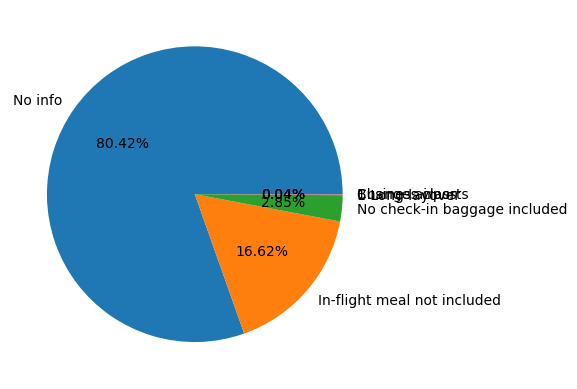

In [46]:
label = test_data['Additional_Info'].value_counts().keys()
Value_count = test_data['Additional_Info'].value_counts()
plt.pie(Value_count,labels=label,autopct='%.2f%%')
plt.show()
#Since more the 80% value in 'Additional_Info' is No info value so we can drop it

In [47]:
test_data.drop(['Additional_Info'],axis=1,inplace=True)

In [48]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Day/Night_flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2,6,6,2019,17,30,4,25,10,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2,12,5,2019,6,20,10,20,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,21,5,2019,19,15,19,0,23,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,21,5,2019,8,0,21,0,13,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,45,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [49]:
# Find important feature
train_data.corr().T

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Day/Night_flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
Total_Stops,1.000000,-0.034585,0.013169,NaN,-0.039140,-0.057653,0.107950,-0.181985,0.528400,NaN,0.114613,-0.045878,-0.023462,-0.228780,0.237822,0.011940,0.297513,0.030371,-0.267993,0.008419,-0.074018,-0.022265,-0.255473,0.432261,0.123824,-0.299299,0.432261,-0.486869,-0.299299,-0.255473,0.035624,0.514278
Journey_day,-0.034585,1.000000,-0.038359,NaN,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,NaN,-0.011064,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254,-0.153774
Journey_month,0.013169,-0.038359,1.000000,NaN,0.039127,-0.059267,-0.003927,-0.100626,0.016141,NaN,0.017250,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685,-0.103643
Journey_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hour,-0.039140,0.002170,0.039127,NaN,1.000000,-0.024745,0.005180,0.067911,0.002869,NaN,-0.313717,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138,0.006799
Dep_min,-0.057653,-0.008170,-0.059267,NaN,-0.024745,1.000000,0.043122,-0.017597,-0.022104,NaN,0.018198,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129,-0.024458
Arrival_hour,0.107950,-0.003245,-0.003927,NaN,0.005180,0.043122,1.000000,-0.154363,0.055276,NaN,0.293043,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366,0.024244
Arrival_min,-0.181985,-0.017510,-0.100626,NaN,0.067911,-0.017597,-0.154363,1.000000,-0.074450,NaN,0.012210,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271,-0.086155
Duration_hour,0.528400,-0.022059,0.016141,NaN,0.002869,-0.022104,0.055276,-0.074450,1.000000,NaN,0.098310,0.261707,-0.094044,-0.346230,0.307196,-0.011847,-0.008070,-0.002271,-0.263844,-0.008253,-0.020358,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052,0.508778
Duration_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


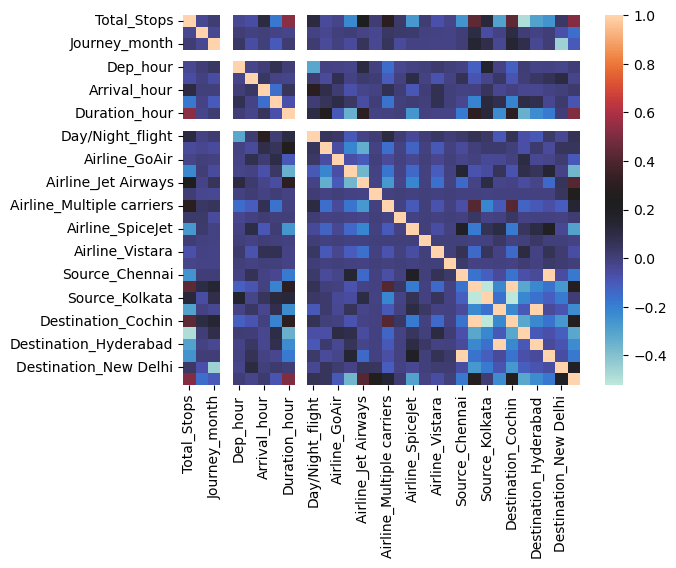

In [50]:
sns.heatmap(train_data.corr(),cmap='icefire')
plt.show()

In [51]:
X = train_data.iloc[:,:-1]

In [52]:
Y = train_data.iloc[:,-1]

In [53]:
from sklearn.ensemble import ExtraTreesRegressor

In [54]:
selection = ExtraTreesRegressor()

In [55]:
X

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Day/Night_flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,5,2019,5,50,13,15,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,9,6,2019,9,25,4,25,19,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,12,5,2019,18,5,23,30,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,1,3,2019,16,50,21,35,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,2019,19,55,22,25,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,2019,20,45,23,20,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,2019,8,20,11,20,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,2019,11,30,14,10,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [56]:
selection.fit(X,Y)

ExtraTreesRegressor()

In [57]:
len(list(train_data.columns))

32

In [58]:
print(selection.feature_importances_)

[2.13669064e-01 1.45753712e-01 5.32167414e-02 0.00000000e+00
 2.41896779e-02 2.53468258e-02 3.02952217e-02 2.28472275e-02
 1.13130350e-01 0.00000000e+00 4.18261243e-03 1.43085651e-02
 2.15982731e-03 2.46073253e-02 1.40622972e-01 6.83210449e-02
 1.23060228e-02 7.96182969e-04 3.81799753e-03 1.07857555e-04
 4.62433416e-03 9.71324453e-05 4.49677894e-04 1.96680698e-02
 3.67792403e-03 7.57994831e-03 1.31733072e-02 1.73905394e-02
 8.10990412e-03 4.50538083e-04 2.50993973e-02]


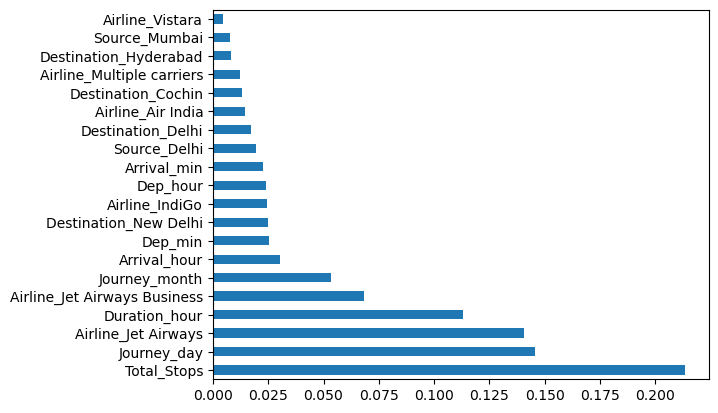

In [59]:
#plot important feature
feature_important = pd.Series(selection.feature_importances_,index=X.columns)
feature_important.nlargest(20).plot(kind='barh')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [62]:
RFC = RandomForestRegressor(n_estimators=15)

In [63]:
RFC.fit(X_train,y_train)

RandomForestRegressor(n_estimators=15)

In [64]:
y_pred = RFC.predict(X_test)

In [65]:
print(len(y_pred))
print(len(y_test))

2137
2137


In [66]:
from sklearn import metrics

In [67]:
print('Accuracy of Trained model: ',RFC.score(X_train,y_train))

Accuracy of Trained model:  0.9467970455036389


In [68]:
print('Accuracy of Test model: ',RFC.score(X_test,y_test))

Accuracy of Test model:  0.8341698535056934


In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
params = {'n_estimators':[5,10,15],
          'max_depth':[5,10,None]}

In [71]:
Rsc = RandomizedSearchCV(RFC,param_distributions=params,n_jobs=-1,verbose=2,cv=5)

In [72]:
Rsc.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\vi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=15),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, None],
                                        'n_estimators': [5, 10, 15]},
                   verbose=2)

In [73]:
Rsc.best_score_

0.7862935380682241

In [74]:
Rsc.best_params_

{'n_estimators': 15, 'max_depth': 10}

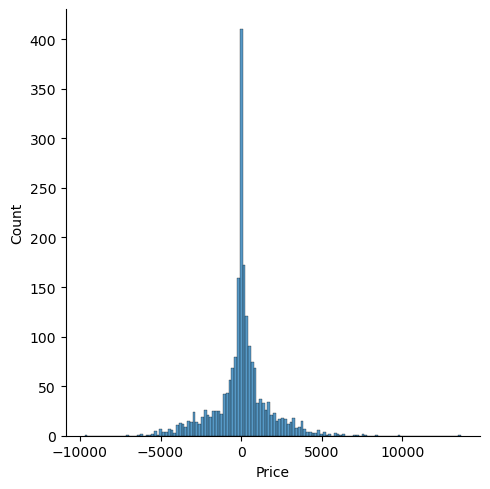

In [75]:
sns.displot(y_pred-y_test)    
plt.show()

C:\Users\vi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


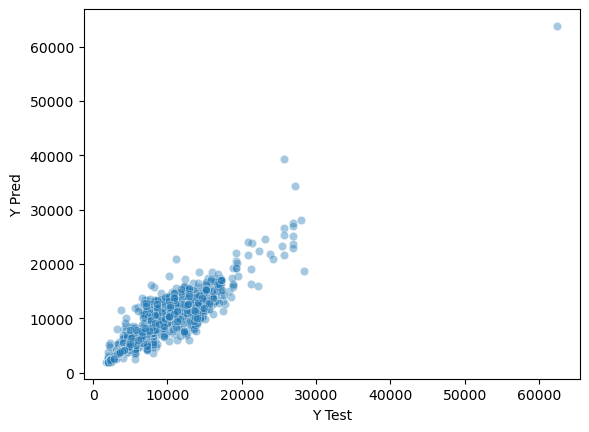

In [76]:
sns.scatterplot(y_test,y_pred,alpha=0.4)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.show()

In [77]:
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("R2_Score: ",metrics.r2_score(y_test,y_pred))

MSE:  3193171.829683489
RMSE:  1786.9448311807193
MAE:  1127.3129615764572
R2_Score:  0.8341698535056934


In [78]:
import pickle
# open a file where you want to store the data
file = open('flight_fare_prediction.pkl','wb')

# dump information to that file
pickle.dump(RFC,file)


In [79]:
model = open('flight_fare_prediction.pkl','rb')
forest = pickle.load(model)

In [80]:
 prediction = forest.predict(X_test)

In [81]:
print("R2_score",metrics.r2_score(y_test,prediction))

R2_score 0.8341698535056934


In [83]:
new_data= np.array([0,24,3,2019,22,20,1,10,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]).reshape(1,-1)

In [85]:
new_data.shape

(1, 31)

In [87]:
price = forest.predict(new_data)

C:\Users\vi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [90]:
print(price[0])

4339.9
